# Project: Investigating Medical Appointment No Shows Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset

In this notebook, I will use the [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments) dataset. The dataset has more than 100K medical appointments in Brazil through 2016. It focuses on answering whether the patient will show up for his/her appointment or not.

* Features

|  Index |     Feature    |                                             Description                                            |
|:-:|:-:|:-:|
|    0   |    PatientID   |                                          ID of the patient                                         |
|    1   |  AppointmentID |                                        ID of the appointment                                       |
|    2   |     Gender     |                                        Male (M) / Female (F)                                       |
|    3   |  ScheduledDay  |                               The date of scheduling the appointment                               |
|    4   | AppointmentDay |                                 The date of the actual appointment                                 |
|    5   |       Age      |                                       The age of the patient                                       |
|    6   |  Neighbourhood |                         The neighbourhood where the appointment takes place                        |
|    7   |   Scholarship  | [Financial Aid](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) Available ? True (1) / False (0) |
|    8   |  Hipertension  |                   **Hypertesnion** aka high blood pressure ? True (1) / False (0)                  |
|    9   |    Diabetes    |                                   Diabetes ? True (1) / False (0)                                  |
|   10   |    Alcholism   |                                        True (1) / False (0)                                        |
|   11   |     Handcap    |                                 No. of disabilities in the patient                             |
|   12   |  SMS_recieved  |                                        True (1) / False (0)                                        |
| **13** |   **No-show**  |                                      **True (1) / False (0)**                                      |


### Possible Questions ?

I'll try to find answers to the following questions:
* Is the age considered to be a barrier for not showing for appointments? What are these specific ages (Kids, Adults, Old)?
* Are there neighbourhoods that has high percentage of not showing for the appointments ?
* What do the people in Brazil suffer from the most ? Can we improve the medical services for these cases ?
* Is there strong coloration between not attending the appointment and the span between the appointment day and the day where it was scheduled?
* Does being enrolled in the Brazil aid program help families to go their medical appointments more and pay for them ?

## Importing Packages

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Data

In [116]:
df = pd.read_csv("medicalappointmentsnoshow.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


So, there is no null values in any of our records

In [118]:
# Make sure no null values are present
df.isnull().sum() # All feature should show 0s

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Let's make sure there are no duplicates

In [119]:
df.duplicated().sum()

0

Let's drop the ID of the patient and the appointment, we don't need them in our analyses.

In [120]:
df.drop(labels=['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's extract the date only from ```ScheduledDay``` and convert it to ```datetime``` type. As ```AppointmentDay``` only has date in it and the time is all zeros.[[1]](https://stackoverflow.com/questions/32837484/extract-date-from-string-pandas-data-frame)

But first, let's look at the way the dates were recorded.

In [121]:
df[df["ScheduledDay"].str.contains("2016-02-01")]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27185,F,2016-02-01T14:11:49Z,2016-05-05T00:00:00Z,41,RESISTÊNCIA,0,0,0,0,0,1,No
71434,M,2016-02-01T11:56:10Z,2016-05-04T00:00:00Z,77,ITARARÉ,0,1,0,0,0,1,No
71436,F,2016-02-01T14:05:40Z,2016-05-18T00:00:00Z,70,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
71441,F,2016-02-01T09:16:59Z,2016-05-06T00:00:00Z,95,SÃO JOSÉ,0,1,1,0,1,1,Yes
71443,F,2016-02-01T09:17:33Z,2016-05-06T00:00:00Z,87,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
71446,M,2016-02-01T09:18:04Z,2016-05-06T00:00:00Z,80,SÃO PEDRO,0,0,0,0,0,1,No
71449,M,2016-02-01T10:30:52Z,2016-05-06T00:00:00Z,78,SANTO ANTÔNIO,0,1,0,0,0,1,No
71450,M,2016-02-01T11:52:11Z,2016-05-13T00:00:00Z,69,MARIA ORTIZ,0,0,0,0,0,0,Yes
71451,M,2016-02-01T10:31:55Z,2016-05-06T00:00:00Z,71,SÃO JOSÉ,0,1,0,0,1,1,No
71452,F,2016-02-01T10:32:40Z,2016-05-13T00:00:00Z,88,CRUZAMENTO,0,1,0,0,0,0,No


So the date is in the format ```%Y-%m-%dT%H:%M:%SZ``` [ref](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [122]:
# Test the date format
pd.to_datetime("2016-04-01T14:27:30Z")

Timestamp('2016-04-01 14:27:30')

Convert the object type in ```ScheduledDay``` and ```AppointmentDay``` to datetime then keep only the date as the time in ```AppointmentDay``` contains zeros.

In [123]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')

In [124]:
# KEEP ONLY DATE
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()
df['AppointmentDay'] = df['AppointmentDay'].dt.normalize()

In [125]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


For more convenient feeling, we will switch ```No``` and ```Yes``` for ```No_show``` with ```Showed```, ```Not_Showed```.

In [126]:
def replace(state):
    if state == "No":
        return "Showed"
    else:
        return "Not_Showed"

In [127]:
df['Showed'] = df['No-show'].apply(lambda x: replace(x))

In [128]:
df.drop(labels=['No-show'], axis=1, inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Showed            110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [253]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Our data is ready for EDA.

## EDA

In [130]:
# masks
show = df["Showed"] == "Showed"
no_show = df["Showed"] == "Not_Showed"
df_showed = df[show]
df_not_showed = df[no_show]

### Q1: Is Age a common feature/problem for those who didn't show for the appointment ?

#### Age

In [131]:
df['Age'].value_counts().sort_index()

-1         1
 0      3539
 1      2273
 2      1618
 3      1513
 4      1299
 5      1489
 6      1521
 7      1427
 8      1424
 9      1372
 10     1274
 11     1195
 12     1092
 13     1103
 14     1118
 15     1211
 16     1402
 17     1509
 18     1487
 19     1545
 20     1437
 21     1452
 22     1376
 23     1349
 24     1242
 25     1332
 26     1283
 27     1377
 28     1448
        ... 
 73      725
 74      602
 75      544
 76      571
 77      527
 78      541
 79      390
 80      511
 81      434
 82      392
 83      280
 84      311
 85      275
 86      260
 87      184
 88      126
 89      173
 90      109
 91       66
 92       86
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64

So there is someone was recorded to have age of -1. It must be a mistake. We will drop this row. For those who have age of 0, they must be babies. If it was also a mistake, it wouldn't occur 3539 times for sure.

In [132]:
df = df[df["Age"]>=0]

In [133]:
df['Age'].value_counts().sort_index()

0      3539
1      2273
2      1618
3      1513
4      1299
5      1489
6      1521
7      1427
8      1424
9      1372
10     1274
11     1195
12     1092
13     1103
14     1118
15     1211
16     1402
17     1509
18     1487
19     1545
20     1437
21     1452
22     1376
23     1349
24     1242
25     1332
26     1283
27     1377
28     1448
29     1403
       ... 
73      725
74      602
75      544
76      571
77      527
78      541
79      390
80      511
81      434
82      392
83      280
84      311
85      275
86      260
87      184
88      126
89      173
90      109
91       66
92       86
93       53
94       33
95       24
96       17
97       11
98        6
99        1
100       4
102       2
115       5
Name: Age, Length: 103, dtype: int64

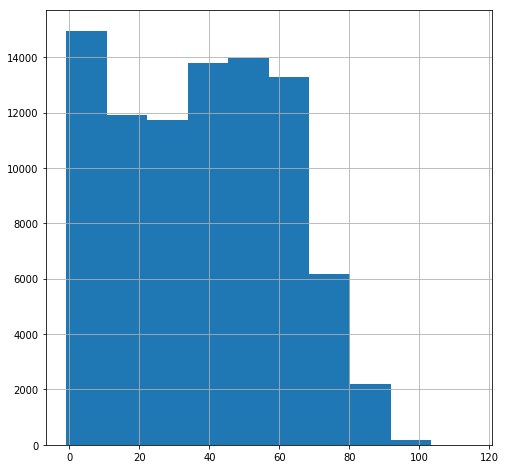

In [139]:
df_showed['Age'].hist(figsize=(8, 8))

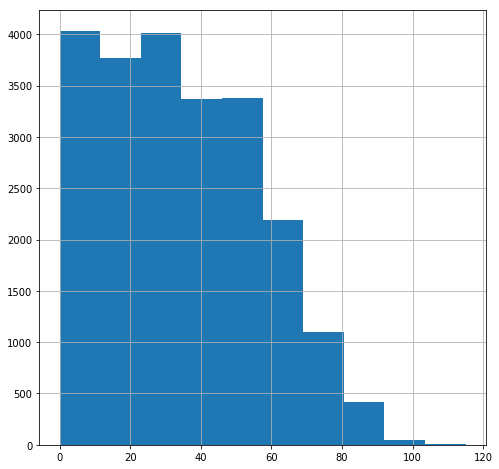

In [140]:
df_not_showed['Age'].hist(figsize=(8, 8))

(array([4.035e+03, 3.767e+03, 4.009e+03, 3.371e+03, 3.375e+03, 2.192e+03,
        1.101e+03, 4.200e+02, 4.600e+01, 3.000e+00]),
 array([  0. ,  11.5,  23. ,  34.5,  46. ,  57.5,  69. ,  80.5,  92. ,
        103.5, 115. ]),
 <a list of 10 Patch objects>)

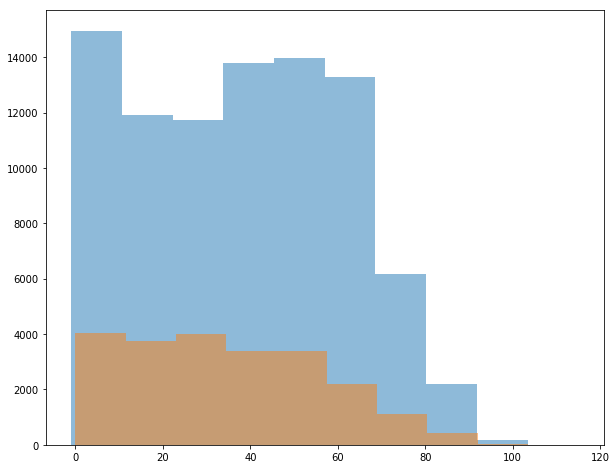

In [328]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(df_showed['Age'], alpha=0.5, label='Showed')
ax.hist(df_not_showed['Age'], alpha=0.5, label='Didn\'t Show')

**As distributions, for each age range, the percentage of this range to all ranges in cases of "Showed" and "Not_Showed" are similar.**

### Q2: What are the neighbourhoods that has high percentage of not showing for the appointments ?

In [159]:
neighbourhoods_number = df["Neighbourhood"].nunique()

In [160]:
print("There are {} neighbourhoods in this dataset".format(neighbourhoods_number))

There are 81 neighbourhoods in this dataset


In [161]:
neighbourhoods = df['Neighbourhood'].value_counts()

In [177]:
neighbourhoods

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

We can investigate the neighbourhoods which have number of appointments than a threshold which can be the mean.

In [164]:
neighbourhoods_many = neighbourhoods[neighbourhoods>neighbourhood.mean()]

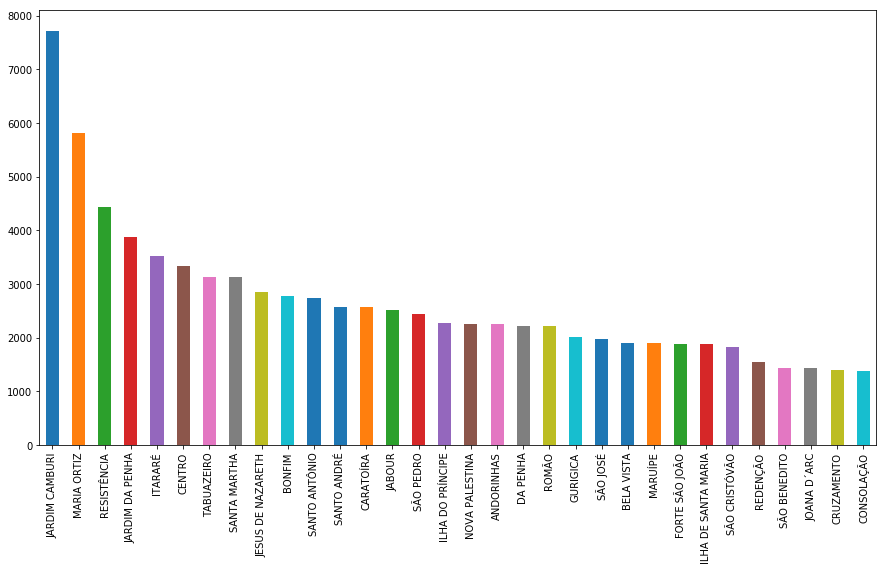

In [192]:
neighbourhood.plot(kind="bar", figsize=(15, 8))

The highest neighbourhood in number of appointments is **JARDIM CAMBURI** with about 7800, the second is **MARIA ORTIZ** with about 6000, the rest of the *crowded neighbourhoods* are nearly the same.

**What about searching for most neighbourhoods in "not_showing" cases?**

> We will look at the neighbourhoods which have more than 100 total appointments.

In [181]:
neighbourhoods_100 = neighbourhoods.drop(index=neighbourhoods[neighbourhoods<100].index, axis=0)
neighbourhoods_100

JARDIM CAMBURI         7717
MARIA ORTIZ            5805
RESISTÊNCIA            4431
JARDIM DA PENHA        3877
ITARARÉ                3514
CENTRO                 3334
TABUAZEIRO             3132
SANTA MARTHA           3131
JESUS DE NAZARETH      2853
BONFIM                 2773
SANTO ANTÔNIO          2746
SANTO ANDRÉ            2571
CARATOÍRA              2565
JABOUR                 2509
SÃO PEDRO              2448
ILHA DO PRÍNCIPE       2266
NOVA PALESTINA         2264
ANDORINHAS             2262
DA PENHA               2217
ROMÃO                  2214
GURIGICA               2018
SÃO JOSÉ               1977
BELA VISTA             1907
MARUÍPE                1902
FORTE SÃO JOÃO         1889
ILHA DE SANTA MARIA    1885
SÃO CRISTÓVÃO          1836
REDENÇÃO               1553
SÃO BENEDITO           1439
JOANA D´ARC            1427
                       ... 
MONTE BELO              824
PARQUE MOSCOSO          802
GOIABEIRAS              700
JUCUTUQUARA             694
FONTE GRANDE        

In [182]:
not_showed_cases = df_not_showed["Neighbourhood"].value_counts()

In [186]:
not_showed_perc = not_showed_cases / neighbourhoods_100 * 100
not_showed_perc.dropna(inplace=True)
not_showed_perc

ANDORINHAS             23.032714
ANTÔNIO HONÓRIO        18.450185
ARIOVALDO FAVALESSA    21.985816
BARRO VERMELHO         21.513002
BELA VISTA             20.136340
BENTO FERREIRA         22.494172
BOA VISTA              18.589744
BONFIM                 19.834115
CARATOÍRA              23.040936
CENTRO                 21.085783
COMDUSA                18.064516
CONQUISTA              18.845701
CONSOLAÇÃO             17.223837
CRUZAMENTO             21.745351
DA PENHA               19.350474
DE LOURDES             15.409836
DO CABRAL              15.714286
DO MOSCOSO             22.276029
DO QUADRO              16.489988
ENSEADA DO SUÁ         22.127660
ESTRELINHA             19.702602
FONTE GRANDE           21.847507
FORTE SÃO JOÃO         18.316570
FRADINHOS              18.604651
GOIABEIRAS             19.571429
GRANDE VITÓRIA         20.261438
GURIGICA               22.596630
HORTO                  24.000000
ILHA DAS CAIEIRAS      21.942110
ILHA DE SANTA MARIA    19.151194
          

In [187]:
not_showed_perc_many = not_showed_perc[not_showed_perc>not_showed_perc.mean()].sort_values(ascending=False)

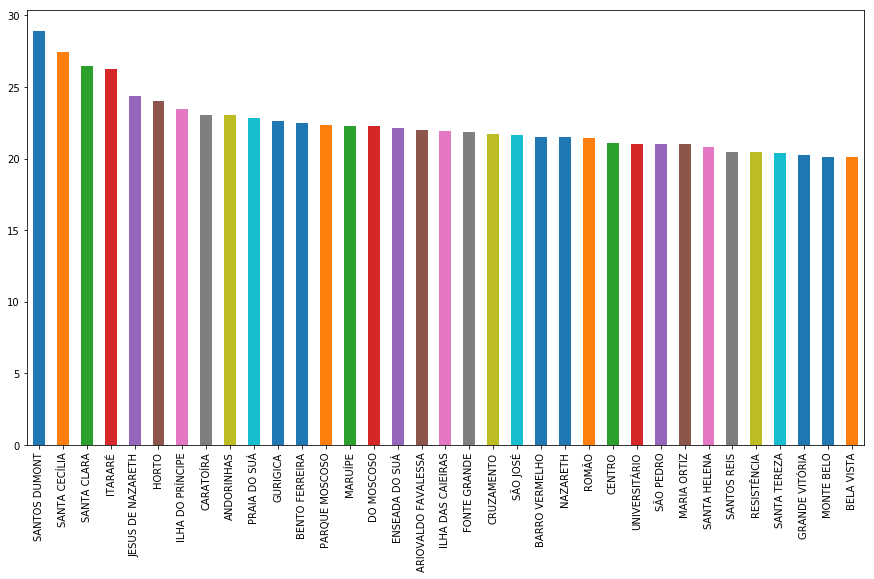

In [191]:
not_showed_perc_many.plot(kind='bar', figsize=(15, 8))

In the neighbourhoods that has over 100 total appointments, **SANTOS DUMONT** has the highest not-showing percentage about 28%, the second is **SANTA CECILIA** with around 27%.

**What about the most neighbourhood in total appointments JARDIM CAMBURI?**

In [204]:
print("JARDIM CAMBURI has about {:.2f}% not-showing appointements".format(not_showed_perc['JARDIM CAMBURI']))

JARDIM CAMBURI has about 18.98% not-showing appointements


WOW, JARDIM CAMBURI is doing pretty well.

## Q3: What do the people in Brazil suffer from the most ? Can we improve the medical services for these cases ?

In [210]:
df_diseases = df.loc[:, ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Showed']]
df_diseases.head()

,Hipertension,Diabetes,Alcoholism,Handcap,Showed
0,1,0,0,0,Showed
1,0,0,0,0,Showed
2,0,0,0,0,Showed
3,0,0,0,0,Showed
4,1,1,0,0,Showed


In [217]:
def other_cases(row):
    """returns 1 if the patient doesn't suffer from any mentioned disease in the dataset, 0 otherwise"""
    if row["Hipertension"] + row["Diabetes"] + row["Alcoholism"] + row["Handcap"] == 0:
        return 1
    else:
        return 0

In [218]:
df_diseases["other"] = df_diseases.apply(lambda x: other_cases(x), axis=1)

In [219]:
df_diseases.head()

,Hipertension,Diabetes,Alcoholism,Handcap,other,Showed
0,1,0,0,0,0,Showed
1,0,0,0,0,1,Showed
2,0,0,0,0,1,Showed
3,0,0,0,0,1,Showed
4,1,1,0,0,0,Showed


In [220]:
df_diseases = df_diseases.loc[:, ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'other', 'Showed']]

In [330]:
df_diseases.shape

(110526, 6)

In [225]:
df_diseases['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

So, We care in ```Handcap``` feature about does it exist or not. We will modify it. 

In [226]:
def handcap_exitst(handcap):
    if handcap==0:
        return 0
    else:
        return 1

In [236]:
df_diseases["Handcap"] = df_diseases["Handcap"].apply(lambda x: handcap_exitst(x))

In [329]:
df_diseases['Handcap'].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

In [241]:
cases_num = []
diseases = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'other']
for col in diseases:
    cases_num.append(df_diseases[col].value_counts()[1]) # take 1 as 1 means exists

In [242]:
cases_num

[21801, 7943, 3360, 2241, 84114]

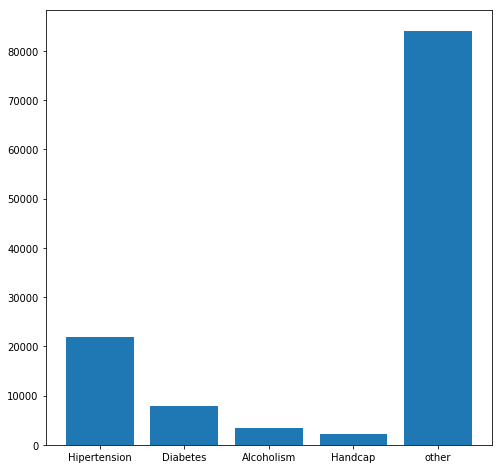

In [243]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(diseases, cases_num)
plt.show()

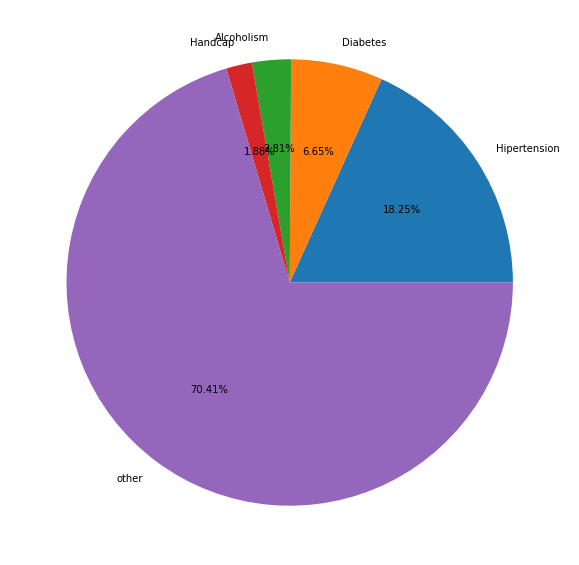

In [333]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('equal')
ax.pie(cases_num, labels = diseases,autopct='%1.2f%%');

* Most appointment are scheduled for diseases other than mentioned in the data, they should specify the disease or the suffering better in order to have better insights about the most disease or suffering spread in the country.
* However, the numbers of those suffer of hypertension are clearly higher than the other diseases. We should focus on improving the medical facilities that cure this suffering. Let's look at them specifically.

<BarContainer object of 4 artists>

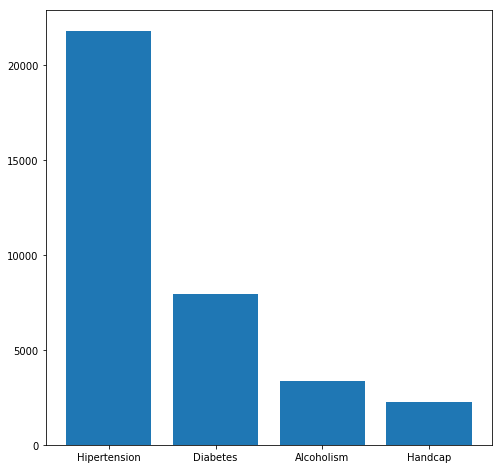

In [246]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(diseases[:-1], cases_num[:-1])

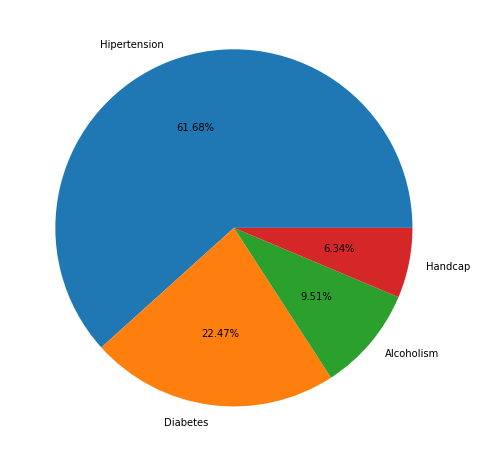

In [252]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
ax.pie(cases_num[:-1], labels = diseases[:-1],autopct='%1.2f%%');

## Q4: Is there strong coloration between not attending the appointment and the span between the appointment day and the day where it was scheduled?

In [299]:
df_dates = df.loc[:, ['ScheduledDay', 'AppointmentDay', 'Showed']]

In [300]:
df_dates.head()

,ScheduledDay,AppointmentDay,Showed
0,2016-04-29,2016-04-29,Showed
1,2016-04-29,2016-04-29,Showed
2,2016-04-29,2016-04-29,Showed
3,2016-04-29,2016-04-29,Showed
4,2016-04-29,2016-04-29,Showed


In [301]:
def get_span(row):
    return (row["AppointmentDay"] - row['ScheduledDay']).days

In [302]:
df_dates["span"] = df_dates.apply(lambda x: get_span(x), axis=1)

In [303]:
df_dates.head()

,ScheduledDay,AppointmentDay,Showed,span
0,2016-04-29,2016-04-29,Showed,0
1,2016-04-29,2016-04-29,Showed,0
2,2016-04-29,2016-04-29,Showed,0
3,2016-04-29,2016-04-29,Showed,0
4,2016-04-29,2016-04-29,Showed,0


In [304]:
df_dates["span"].nunique()

131

In [305]:
df_dates["span"].min()

-6

There are negative spans in this data which must be mistakes in the recording, we will remove them.

In [306]:
df_dates = df_dates[df_dates['span']>=0]

In [307]:
df_dates['span'].min()

0

In [311]:
# AS SCATTER REQUIRES INT WE WILL CAST SHOWED COLUMN TO INT
def int_showed(row):
    if row == "Showed":
        return 1
    else:
        return 0

In [312]:
df_dates["Showed"] = df_dates["Showed"].apply(lambda x: int_showed(x))

Text(0,0.5,'Showed (1:Showed, 0:Not_Showed)')

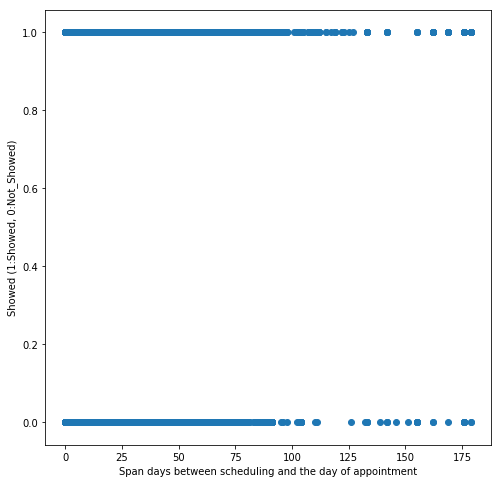

In [318]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df_dates["span"], df_dates["Showed"])
ax.set_xlabel("Span days between scheduling and the day of appointment")
ax.set_ylabel("Showed (1:Showed, 0:Not_Showed)")

Not really that strong coloration betweeen showing for the appointment and the days between the appointment and scheduling.

## Q5: Does being enrolled in the Brazil aid program help families to go their medical appointments more and pay for them ?

In [315]:
df_scholarship = df.loc[:, ['Scholarship', 'Showed']]

In [316]:
df_scholarship.head()

,Scholarship,Showed
0,0,Showed
1,0,Showed
2,0,Showed
3,0,Showed
4,0,Showed


In [319]:
df_scholarship["Showed"] = df_scholarship["Showed"].apply(lambda x: int_showed(x))

Text(0,0.5,'Showed (1:Showed, 0:Not_Showed)')

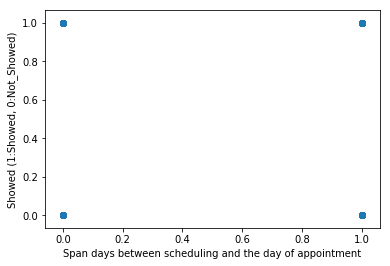

In [322]:
fig, ax = plt.subplots()
ax.scatter(df_scholarship["Scholarship"], df_scholarship["Showed"])
ax.set_xlabel("Span days between scheduling and the day of appointment")
ax.set_ylabel("Showed (1:Showed, 0:Not_Showed)")

Not the most beautiful thing, we can use the confusion matrix from ```seaborn``` package. [here](https://datatofish.com/confusion-matrix-python/) and [here](https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers)

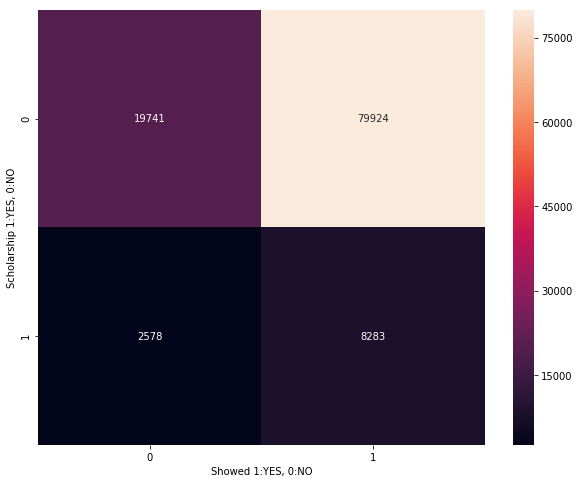

In [326]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(10, 8))
confusion_matrix = pd.crosstab(df_scholarship['Scholarship'], df_scholarship['Showed'], rownames=['Scholarship 1:YES, 0:NO'], colnames=['Showed 1:YES, 0:NO'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')

Whether there was enrollement in the financial aid program, the percentage of not-showing is nearly the same 20%. However, 80% of the patients enrolled in that program have shown for their appointments and benefited from the medical treatment.

## Conclusions

To conclude answers for questions we previously asked...
* Q:  Is the age considered to be a barrier for not showing for appointments? What are these specific ages (Kids, Adults, Old)?

**A: The distribution of the ages of those showed and didn't show for the appointments look alike. The most appointment attendees are 10 years old or below. Same age region is the highest for those who didn't show. We believed at beginning that being young and being busy with school might be a problem same for adult and their work. But, this isn't the case here**


* Q: Are there neighbourhoods that has high percentage of not showing for the appointments ?

**A: Although, JARDIM CAMBURI is the highest neighbourhood in the number of total appointments and suprisingly, not the most one in percentage of didn't show cases to the total number, it was SANTOS DUMONT with 28% and SANTA CECILIA with 27%**


* What do the people in Brazil suffer from the most ? Can we improve the medical services for these cases ?

**A: The diseases were asked about in the dataset are Hypertension, Diabetes, Alcoholism, Handicap. Among more than 100K patients in the dataset, about 18.25% suffer from hypertension more than 6.65% for diabetes, 2.8% for alcholism and 2% who suffer from handicaps.**


* Is there strong coloration between not attending the appointment and the span between the appointment day and the day where it was scheduled?

**A: According to this data, No. Scheduling the appointment at the same day doesn't gurantee that patient will show or not**

* Does being enrolled in the Brazil aid program help families to go their medical appointments more and pay for them ?

**A: Indeed 80% of the poor patients who are enrolled in that program showed for their appointments with the doctors.**